## Demo : SVM for MNIST Digit Recognition
In this demo, you will learn to:
1. Load and display images
2. Build a simple SVM image classifier
3. Use SVM for diferent kernele eg linear, rbf
4. Save and load results using pickle

### Dataset:
For data, we will use the classic MNIST data set used to recognize hand-written digits. The dataset was originally produced in the 1980s and is now widely-used in machine learning classes as a simple image classification problem.

Loading the Data
First, we load the standard pack

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The sklearn module has the MNIST dataset module built in. It can be loaded as follows. 

In [2]:
from sklearn import datasets, linear_model, preprocessing
digits = datasets.load_digits()
images = digits.images
labels = digits.target
images.shape

(1797, 8, 8)

We can see that the data is stored in an array with 1797 images, each 8 x 8.

The above is fairly low-resolution. We can get a more high-resolution 28 x 28 image data from the following command. In this data format, each image is stored as a 784 = 28x28 row vector.


In [7]:
from sklearn.datasets import load_digits
mnist = load_digits()

In [8]:
mnist.data.shape


(1797, 64)

We have 70000 images and each image is 28 x 28, which is stored as a 784 pixel vector. The following code plots a digit. To do this, it reshapes the 784 dim vector to a 28 x 28 array and then uses the plt.imshow command.



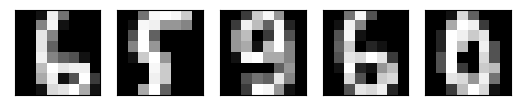

In [13]:
def plt_digit(x):
    rows = 8
    cols = 8
    xsq = x.reshape((rows,cols))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

# Convert data to a matrix
X = mnist.data
y = mnist.target

# Select random digits
nplt = 5
nsamp = X.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt,i+1)
    plt_digit(X[ind,:])

# Run an SVM classifier

First, we import the SVM package and construct the SVC with the parameters.

In [14]:
from sklearn import svm

# Create a classifier: a support vector classifier
# svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

Next, we get the training and test data. The features are re-scaled to be between -1 and 1.
We fit the training data. Again, this will take several minutes.

In [33]:
Xs = X/255.0*2 - 1
ntr = 1000
nts = 797
Xtr = Xs[Iperm[:ntr],:]
ytr = y[Iperm[:ntr]]
Xts = Xs[Iperm[ntr:ntr+nts],:]
yts = y[Iperm[ntr:ntr+nts]]

In [34]:
svc.fit(Xtr,ytr)

[LibSVM]*
optimization finished, #iter = 40
obj = -46.727687, rho = 1.519771
nSV = 33, nBSV = 26
*
optimization finished, #iter = 32
obj = -52.266681, rho = 2.654319
nSV = 34, nBSV = 27
*
optimization finished, #iter = 35
obj = -55.141457, rho = 3.781891
nSV = 40, nBSV = 30
*
optimization finished, #iter = 42
obj = -62.270028, rho = -4.958842
nSV = 41, nBSV = 33
*
optimization finished, #iter = 86
obj = -73.650199, rho = 3.533310
nSV = 51, nBSV = 37
*
optimization finished, #iter = 36
obj = -64.923243, rho = 1.421554
nSV = 44, nBSV = 35
*
optimization finished, #iter = 52
obj = -43.807631, rho = 0.983429
nSV = 33, nBSV = 21
*
optimization finished, #iter = 73
obj = -58.741377, rho = 5.554508
nSV = 44, nBSV = 29
*
optimization finished, #iter = 44
obj = -73.612368, rho = 8.023172
nSV = 49, nBSV = 40
*
optimization finished, #iter = 65
obj = -112.482900, rho = 0.785305
nSV = 69, nBSV = 58
*
optimization finished, #iter = 64
obj = -90.654167, rho = -1.236291
nSV = 56, nBSV = 47
*
optimiza

SVC(C=2.8, gamma=0.0073, kernel='linear', verbose=10)

In [35]:
import pickle
with open( "mnist_svc.p", "wb" ) as fp:
    pickle.dump( [svc, Xs, y, Iperm, ntr, nts], fp)


We can reload the data from the pickle in the following manner.


In [36]:
import pickle
with open( "mnist_svc.p", "rb" ) as fp:
    svc, Xs, y, Iperm, ntr, nts = pickle.load(fp)
Xtr = Xs[Iperm[:ntr],:]
ytr = y[Iperm[:ntr]]
Xts = Xs[Iperm[ntr:ntr+nts],:]
yts = y[Iperm[ntr:ntr+nts]]

In [37]:
Xts.shape

(797, 64)

Now we will measure the accuracy on the test data. The prediction can take several minutes as SVMs are very slow.



In [38]:
yhat_ts = svc.predict(Xts)

Since even the prediction (sometimes called inference) is slow with SVMs, we will save the results in pickle file. Instead of running the prediction again, you can recapture the data with the following comamnd

In [39]:
with open("mnist_svc_test.p", "wb") as fp:
    pickle.dump([yts,yhat_ts,Xts], fp)

In [40]:
with open("mnist_svc_test.p", "rb") as fp:
    yts,yhat1,Xts = pickle.load(fp)

In [41]:
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.972396


# Looking at the Support Vectors


Looking at the Support Vectors
Let's take a look at the support vectors. We see there about over 2500 support vectors. So, about quarter the training samples were used as SVs. This is partly why the prediction was so slow.

In [42]:
S = svc.support_vectors_
S.shape

(683, 64)

Let us plot some support vectors

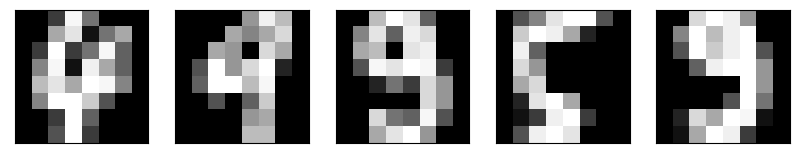

In [43]:
nplt = 5
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Iperms[i]
    plt_digit(S[ind,:])

# Now let us see the performanc of SVM using the RBF kernel


In [44]:
# Create a support vector classifier
svcrbf = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)

In [45]:
# Can skip this step if loading from previous result 
svcrbf.fit(Xtr,ytr)
import pickle
with open( "mnist_svcrbf.p", "wb" ) as fp:
    pickle.dump( [svcrbf, Xs, y, Iperm, ntr, nts], fp)

[LibSVM]*
optimization finished, #iter = 93
obj = -467.663065, rho = -0.676461
nSV = 186, nBSV = 186
*
optimization finished, #iter = 99
obj = -502.392929, rho = -0.710267
nSV = 198, nBSV = 198
*
optimization finished, #iter = 100
obj = -512.302657, rho = -0.754929
nSV = 200, nBSV = 200
*
optimization finished, #iter = 91
obj = -474.242470, rho = -0.773891
nSV = 182, nBSV = 182
*
optimization finished, #iter = 106
obj = -531.842987, rho = 0.815218
nSV = 206, nBSV = 203
*
optimization finished, #iter = 95
obj = -496.051082, rho = -0.804100
nSV = 190, nBSV = 190
*
optimization finished, #iter = 106
obj = -509.767633, rho = 0.759367
nSV = 205, nBSV = 203
*
optimization finished, #iter = 97
obj = -508.610472, rho = -0.795382
nSV = 194, nBSV = 194
*
optimization finished, #iter = 103
obj = -539.338699, rho = 0.878372
nSV = 204, nBSV = 204
*
optimization finished, #iter = 96
obj = -496.715333, rho = 0.845279
nSV = 186, nBSV = 186
*
optimization finished, #iter = 95
obj = -490.812138, rho = 0

In [46]:
import pickle
with open( "mnist_svcrbf.p", "rb" ) as fp:
    svcrbf, Xs, y, Iperm, ntr, nts = pickle.load(fp)
Xtr = Xs[Iperm[:ntr],:]
ytr = y[Iperm[:ntr]]
Xts = Xs[Iperm[ntr:ntr+nts],:]
yts = y[Iperm[ntr:ntr+nts]]

In [47]:
# skip if load from saved result
yhat_ts = svcrbf.predict(Xts)

with open("mnist_svcrbf_test.p", "wb") as fp:
    pickle.dump([yts,yhat_ts,Xts], fp)

In [48]:
# skip if you run the previouse cell
with open("mnist_svcrbf_test.p", "rb") as fp:
    yts,yhat_ts,Xts = pickle.load(fp)

In [49]:
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.086575


We see that the RBF kernel provides more accurate results. Now let us plot some errors



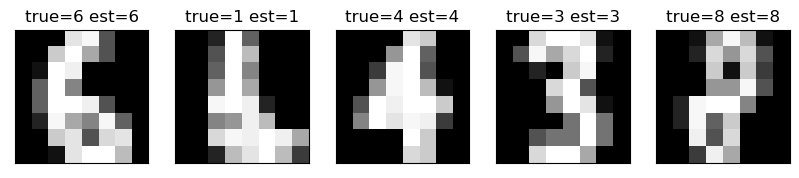

In [50]:
Ierr = np.where((yhat_ts != yts))[0]
nplt = 5
plt.figure(figsize=(10, 5))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Ierr[i]    
    plt_digit(Xts[ind,:])        
    title = 'true={0:d} est={1:d}'.format(yts[ind].astype(int), yhat1[ind].astype(int))
    plt.title(title)

We see that again a human would not have made these errors, but the digits in error are much less clear.



# Looking at the Support Vectors
Let's take a look at the support vectors. We see there about 5000 support vectors. So, about half the training samples were used as SVs, more than that for the linear kernel. This is partly why the prediction was so slow.

In [51]:
S = svcrbf.support_vectors_
S.shape

(1000, 64)

We can plot some of the vectors.



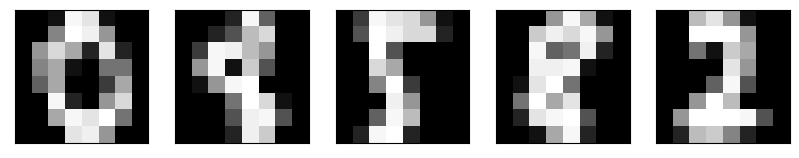

In [52]:
nplt = 5
nsv = S.shape[0]
Iperms = np.random.permutation(nsv)
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Iperms[i]
    plt_digit(S[ind,:])


In this demo, we specified the parameters for the SVC. In the lab, you will be asked to find the optimal parameters through cross validation.